# Classification Project Results

| Team | F1 Score | AUC |
| --- | --- | --- |
| 1_7 | 0.5292 | 0.542 |
| 1_2 | 0.53 | 0.5345 |
| 2_4 | 0.5201 | 0.5385 |
| 1_5 | 0.5295 | 0.5036 |
| 2_3 | 0.5098 | 0.5097 |
| 2_2 | 0.4804 | 0.5274 |
| 2_1 | 0.4909 | 0.4689 |
| 2_5 | 0.4887 | 0.4601 |
| 1_1 | 0.4311 | 0.5337 |
| 1_3 | 0.4648 | 0.4358 |
| 1_6 | 0.4685 | 0.3535 |
| 1_4 | 0.2693 | 0.1822 |

In [9]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

In [10]:
#Get the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
 
#prepare the data
x = data.iloc[:,0:4]

#prepare the target
target = data.iloc[:,4]
 
#Applying it to PCA
pca = PCA(2)
mat_reduced = pca.fit_transform(x)

#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

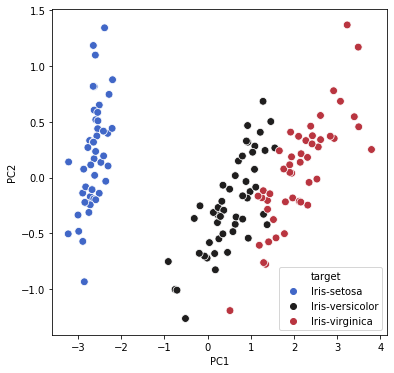

In [11]:
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')

# this is not a homework

In [26]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
   
    def fit(self, x):
        cov_mat = np.cov(x, rowvar = False)
        eig_val, eig_vec = np.linalg.eig(cov_mat)
        idx = eig_val.argsort()[::-1]
        self.eig_vectors = eig_vec[:,idx][:,:self.n_components]
    def transform(self, x):
        return np.dot(x,self.eig_vectors)
    def fit_transform (self,x):
        self.fit(x)
        return self.transform(x)

In [27]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
 
#prepare the data
x = data.iloc[:,0:4]

#prepare the target
target = data.iloc[:,4]
 
#Applying it to PCA
pca = PCA(2)
mat_reduced = pca.fit_transform(x)

#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

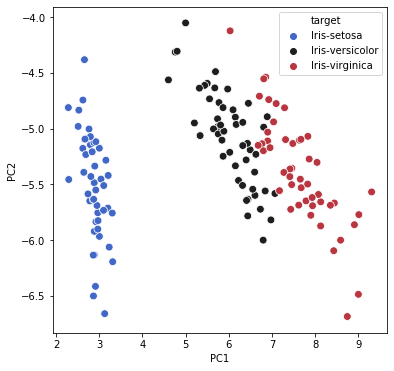

In [28]:
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')

# this is homework

In [29]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

X = mnist.data
y = mnist.target

In [30]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.preprocessing import StandardScaler
import time


In [31]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
# result = pd.DataFrame(columns = ['n_components','accuracy','transformation_time','fitting_time'])
# X = StandardScaler().fit_transform(X)
# result_dict = {}
# for n in [1,10,50,100,200,350,500,600,630,670,720,784]:
 
#     result_dict['n_components'] = n
    
#     pca = PCA(n_components = n)
    
#     start=time.time()
#     pca.fit(X)
#     end=time.time()
#     time_fit=round(end-start,4)
    
#     result_dict['fitting_time'] = time_fit
    
#     start = time.time()    
#     pca.transform(X)
#     end = time.time()
#     time_transformation = round(end-start,4)

#     result_dict['transformation_time'] = time_transformation

#     lg = LogisticRegression(random_state=41)   
    

#     scoring = cross_val_score(lg, pca.transform(X), y, cv=4, scoring='accuracy')


#     result_dict['accuracy']=np.mean(scoring)    
 

#     result = result.append(result_dict, ignore_index = True)
    
# result['n_components'] = result['n_components'].astype('int64')

# result

,n_components,accuracy,transformation_time,fitting_time
0,1,0.298157,5.9459,42.652
1,10,0.799871,1.6329,10.457
2,50,0.903943,1.4630,13.215
3,100,0.916386,1.5600,15.421
4,200,0.921457,2.4060,26.950
5,350,0.921714,3.3460,45.714
6,500,0.919529,5.0350,77.472
7,600,0.917229,34.4180,111.427
8,630,0.916657,5.5020,34.743
9,670,0.915329,5.6360,54.657


In [37]:
result = pd.DataFrame(columns = ['n_components','accuracy','transformation_time','fitting_time'])
X = StandardScaler().fit_transform(X)
result_dict = {}
for n in [1,10,50,100,200,350,500,600,630,670,720,784]:
 
    result_dict['n_components'] = n
    
    pca = PCA(n_components = n)
    
    start=time.time()
    pca.fit(X)
    end=time.time()
    time_fit=round(end-start,4)
    
    result_dict['fitting_time'] = time_fit
    
    start = time.time()    
    pca.transform(X)
    end = time.time()
    time_transformation = round(end-start,4)

    result_dict['transformation_time'] = time_transformation

    lg = LogisticRegression(random_state=41)   
    

    scoring = cross_val_score(lg, pca.transform(X), y, cv=4, scoring='accuracy')


    result_dict['accuracy']=np.mean(scoring)    
 

    result = result.append(result_dict, ignore_index = True)
    
result['n_components'] = result['n_components'].astype('int64')

result

,n_components,accuracy,transformation_time,fitting_time
0,1,0.298143,1.660,13.143
1,10,0.799629,1.352,13.357
2,50,0.903457,1.513,17.639
3,100,0.916314,1.793,18.747
4,200,0.921500,2.688,32.605
5,350,0.921300,4.329,53.320
6,500,0.919371,5.220,80.303
7,600,0.917486,27.130,112.197
8,630,0.916657,5.710,41.048
9,670,0.915329,6.716,34.757
